In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("DI Yogyakarta.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       354 non-null    float64       
 2   Tx       356 non-null    float64       
 3   Tavg     356 non-null    float64       
 4   RH_avg   356 non-null    float64       
 5   RR       282 non-null    float64       
 6   ss       357 non-null    float64       
 7   ff_x     361 non-null    float64       
 8   ddd_x    361 non-null    float64       
 9   ff_avg   361 non-null    float64       
 10  ddd_car  362 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-e5c09a6de12e>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.7,30.9,27.2,26.9
1,2023-02-01,24.2,29.2,0.6,27.2
2,2023-03-01,25.3,29.2,3.2,27.2
3,2023-04-01,24.4,30.2,9.4,27.6
4,2023-05-01,22.4,29.6,18.2,27.0
...,...,...,...,...,...
360,2023-12-16,23.6,30.8,0.0,27.9
361,2023-12-17,25.1,31.5,NaN,28.3
362,2023-12-18,26.1,31.1,0.0,28.2
363,2023-12-19,24.6,31.3,0.0,26.8


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.7,30.9,27.2,26.9
1,31,31,2023-01-02,23.1,29.1,37.2,26.0
2,59,60,2023-01-03,24.1,29.0,0.4,26.3
3,90,92,2023-01-04,23.6,31.2,2.0,26.3
4,120,123,2023-01-05,24.1,31.0,NaN,27.7
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.6,30.8,0.0,27.9
350,350,361,2023-12-17,25.1,31.5,NaN,28.3
351,351,362,2023-12-18,26.1,31.1,0.0,28.2
352,352,363,2023-12-19,24.6,31.3,0.0,26.8


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         11
Tx          9
RR         80
Tavg        9
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       8
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

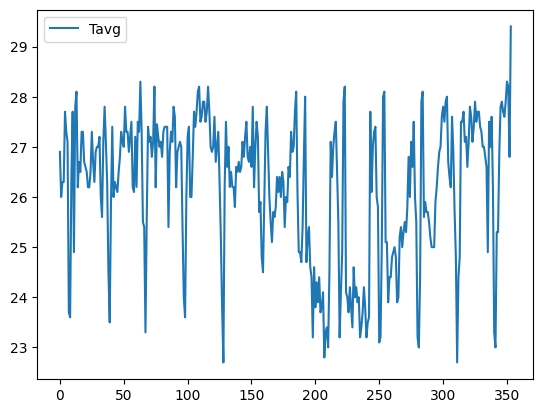

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

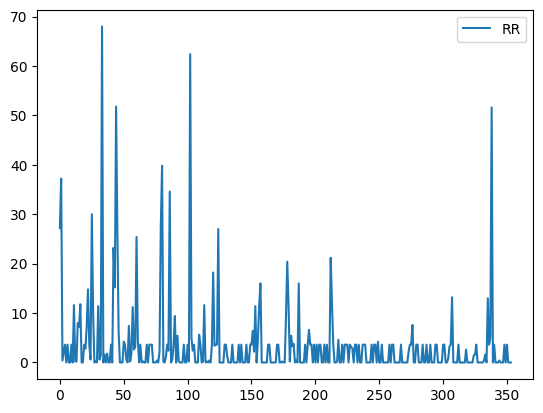

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.7,30.90000,27.200000,26.9,29.10000,26.0,37.200000
1,31,31,2023-01-02,23.1,29.10000,37.200000,26.0,29.00000,26.3,0.400000
2,59,60,2023-01-03,24.1,29.00000,0.400000,26.3,31.20000,26.3,2.000000
3,90,92,2023-01-04,23.6,31.20000,2.000000,26.3,31.00000,27.7,3.606569
4,120,123,2023-01-05,24.1,31.00000,3.606569,27.7,31.00000,27.3,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.6,30.80000,0.000000,27.9,31.50000,28.3,3.606569
350,350,361,2023-12-17,25.1,31.50000,3.606569,28.3,31.10000,28.2,0.000000
351,351,362,2023-12-18,26.1,31.10000,0.000000,28.2,31.30000,26.8,0.000000
352,352,363,2023-12-19,24.6,31.30000,0.000000,26.8,29.44058,29.4,0.000000


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,27.200000,26.9,26.0,37.200000
1,37.200000,26.0,26.3,0.400000
2,0.400000,26.3,26.3,2.000000
3,2.000000,26.3,27.7,3.606569
4,3.606569,27.7,27.3,0.000000
...,...,...,...,...
349,0.000000,27.9,28.3,3.606569
350,3.606569,28.3,28.2,0.000000
351,0.000000,28.2,26.8,0.000000
352,0.000000,26.8,29.4,0.000000


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,27.200000,26.9,26.0,37.200000
1,37.200000,26.0,26.3,0.400000
2,0.400000,26.3,26.3,2.000000
3,2.000000,26.3,27.7,3.606569
4,3.606569,27.7,27.3,0.000000
...,...,...,...,...
348,3.606569,27.6,27.9,0.000000
349,0.000000,27.9,28.3,3.606569
350,3.606569,28.3,28.2,0.000000
351,0.000000,28.2,26.8,0.000000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,27.200000,26.9,26.0,37.200000,0
1,37.200000,26.0,26.3,0.400000,1
2,0.400000,26.3,26.3,2.000000,2
3,2.000000,26.3,27.7,3.606569,3
4,3.606569,27.7,27.3,0.000000,4
...,...,...,...,...,...
348,3.606569,27.6,27.9,0.000000,348
349,0.000000,27.9,28.3,3.606569,349
350,3.606569,28.3,28.2,0.000000,350
351,0.000000,28.2,26.8,0.000000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,24.4
283,283,27.9
284,284,28.1
285,285,25.6
286,286,25.9
...,...,...
348,348,27.6
349,349,27.9
350,350,28.3
351,351,28.2


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([24.59335023, 26.8292555 , 26.95434135, 25.35239312, 25.54144319,
       25.41067214, 25.40782954, 25.27705848, 25.0823232 , 24.95155215,
       24.94870955, 24.94586694, 25.51870236, 25.70359291, 25.96076673,
       26.1498168 , 26.21093842, 26.59188117, 26.71696702, 26.52223174,
       26.77524603, 26.83636766, 26.00199013, 25.80725485, 25.67232427,
       26.56914034, 26.11854816, 25.34813486, 24.76961423, 23.42352291,
       24.50807213, 24.76108642, 26.48527789, 26.48243529, 26.60752114,
       26.22089318, 26.2820148 , 25.89538685, 26.21236537, 26.65727234,
       26.52650129, 26.20383756, 26.39288763, 26.70986615, 26.45116665,
       26.5762525 , 26.57340989, 26.37867462, 26.31186779, 26.11713251,
       26.1142899 , 25.98351885, 25.8527478 , 24.76251337, 26.42274062,
       26.10007689, 26.48101963, 25.58267788, 23.72487275, 23.53013747,
       24.99847205, 24.99562944, 26.01621444, 26.58904986, 26.65017148,
       26.51940043, 26.4525936 , 26.64164367, 26.89465797, 26.82

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.0251065056127118 1.5865552225321546


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,24.4
283,283,27.9
284,284,28.1
285,285,25.6
286,286,25.9
...,...,...
348,348,27.6
349,349,27.9
350,350,28.3
351,351,28.2


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,24.593350
283,26.829256
284,26.954341
285,25.352393
286,25.541443
...,...
348,26.452594
349,26.641644
350,26.894658


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.9,NaN
1,26.0,NaN
2,26.3,NaN
3,26.3,NaN
4,27.7,NaN
...,...,...
348,27.6,26.452594
349,27.9,26.641644
350,28.3,26.894658
351,28.2,26.827851


<Axes: >

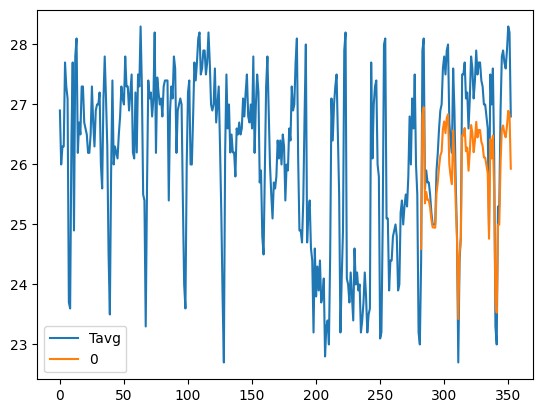

In [27]:
kan.plot()

In [28]:
new_data = [[354,26.8],[355,26.8],[356,26.8],[357,26.8],[358,26.8],[359,26.8],[360,26.8]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.92382418, 25.92098157, 25.91813897, 25.91529637, 25.91245376,
       25.90961116, 25.90676856])

In [29]:
kan.to_json('Prediksi DI Yogyakarta.json')